<a href="https://colab.research.google.com/github/mrm8488/shared_colab_notebooks/blob/master/TWINGAN_manu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab Noteboot to play with [TwinGAN](https://github.com/jerryli27/TwinGAN)
### Unsupervised Image Translation for Human Portraits

> by Manuel Romero

[Webpage](https://mrm8488.github.io)

[Twitter @mrm8488](https://twitter.com/mrm8488)



In [0]:
!git clone https://github.com/mrm8488/TwinGAN.git

Cloning into 'TwinGAN'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 394 (delta 2), reused 0 (delta 0), pack-reused 384
Receiving objects: 100% (394/394), 56.21 MiB | 25.50 MiB/s, done.
Resolving deltas: 100% (118/118), done.


In [0]:
!pip install gdown

In [0]:
model1_id = "1dXfqAODQxB2uNhyQANtZICAjwhNMWnbl"
model2_id = "1UJEqlH_1sfdmWs6MXKV4H69NGad0rdUB"
!gdown https://drive.google.com/uc?id=$model1_id
!gdown https://drive.google.com/uc?id=$model2_id


Downloading...
From: https://drive.google.com/uc?id=1dXfqAODQxB2uNhyQANtZICAjwhNMWnbl
To: /content/twingan_256.zip
240MB [00:01, 158MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UJEqlH_1sfdmWs6MXKV4H69NGad0rdUB
To: /content/human_to_cat_128.zip
239MB [00:02, 80.1MB/s]


In [0]:
!unzip "/content/twingan_256.zip"
!unzip "/content/human_to_cat_128.zip"
!rm -rf "/content/twingan_256.zip"
!rm -rf "/content/human_to_cat_128.zip"

Archive:  /content/twingan_256.zip
   creating: 256/
  inflating: 256/checkpoint          
  inflating: 256/flags.txt           
  inflating: 256/graph.pbtxt         
  inflating: 256/model.ckpt-100000.data-00000-of-00001  
  inflating: 256/model.ckpt-100000.index  
  inflating: 256/model.ckpt-100000.meta  
Archive:  /content/human_to_cat_128.zip
   creating: 128/
  inflating: 128/checkpoint          
  inflating: 128/flags.txt           
  inflating: 128/graph.pbtxt         
  inflating: 128/model.ckpt-741475.data-00000-of-00001  
  inflating: 128/model.ckpt-741475.index  
  inflating: 128/model.ckpt-741475.meta  


In [0]:
cd TwinGAN

/content/TwinGAN


In [0]:
!rm -rf /content/TwinGAN/demo/inference_input/cropped/*
!rm -rf /content/TwinGAN/demo/inference_output/anime/*
!rm -rf /content/TwinGAN/demo/inference_output/cat/*

In [0]:
#@title Choose a mode

model = 'human2cat' #@param ["human2anime", "human2cat"]

models = {'human2anime': '/content/256/', 'human2cat': '/content/128/'}
model_path = models[model]
image_hw = model_path.split("/")[2]
output_folder = "anime" if image_hw == "256" else "cat"
print(model_path)
print(image_hw)
print(output_folder)

/content/128/
128
cat


## Choose a picture form your local filesystem:

In [0]:
from google.colab import files
uploaded = files.upload()

Saving selfie1.png to selfie1.png


In [0]:
uploaded_file = ""
for filename in uploaded.keys():
  uploaded_file = filename
  !mv ./$filename ./demo/inference_input/cropped/$filename

In [0]:
%time !python inference/image_translation_infer.py --model_path=$model_path --image_hw=$image_hw --input_tensor_name="sources_ph" --output_tensor_name="custom_generated_t_style_source:0" --input_image_path="./demo/inference_input/cropped/" --output_image_path="./demo/inference_output/$output_folder/" > /dev/null
print("DONE!")

/usr/local/lib/python3.6/dist-packages/absl/flags/_validators.py:359: UserWarning: Flag --model_path has a non-None default value; therefore, mark_flag_as_required will pass even if flag is not specified in the command line!
  'command line!' % flag_name)


W1027 08:52:28.198196 140700139816832 module_wrapper.py:139] From inference/image_translation_infer.py:50: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.


W1027 08:52:28.198484 140700139816832 module_wrapper.py:139] From inference/image_translation_infer.py:51: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2019-10-27 08:52:28.199116: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX512F
2019-10-27 08:52:28.203498: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000175000 Hz
2019-10-27 08:52:28.203703: I tensorflow/compiler/xla/service/service.cc:168]

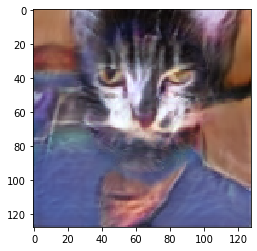

In [0]:
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np

%matplotlib inline
pil_im = Image.open('demo/inference_output/'+output_folder+'/'+uploaded_file, 'r')
imshow(np.asarray(pil_im))

Did you ennjoy it?

[![ko-fi](https://www.ko-fi.com/img/githubbutton_sm.svg)](https://ko-fi.com/Y8Y3VYYE)